配列データの基本統計を確認する
FastQCでDRR000001の基本統計を確認

In [1]:
from Bio import SeqIO
 
# FASTQ形式のデータをリードごとに読み込みます
records = SeqIO.parse('DRR000001.fastq', 'fastq')
 
sequence_length_list = []  # リードごとの塩基数を格納するリスト
GC_count = 0  # GCの合計を格納する
ATGC_count = 0  # ATGCの合計を格納する
 
# リードごとに解析
for record in records:
    sequence_length_list.append(len(record.seq))
    GC_count += (record.seq.count('G') + record.seq.count('C'))
    ATGC_count += (record.seq.count('A') + record.seq.count('T') + record.seq.count('G') + record.seq.count('C'))
 
print('リード数：' + str(len(sequence_length_list)))
print('リード長：' + str(min(sequence_length_list)) + '-' + str(max(sequence_length_list)))
print('GC含量：' + str(GC_count / ATGC_count * 100) + '%')

リード数：34442
リード長：36-36
GC含量：43.453617853777445%


FASTQ形式のデータをSeqRecordオブジェクトに読み込むと、Sequence Quality値はletter_annotations属性にキーが’phred_quality’で、値がSequence Quality値の辞書(類似)の形式で格納

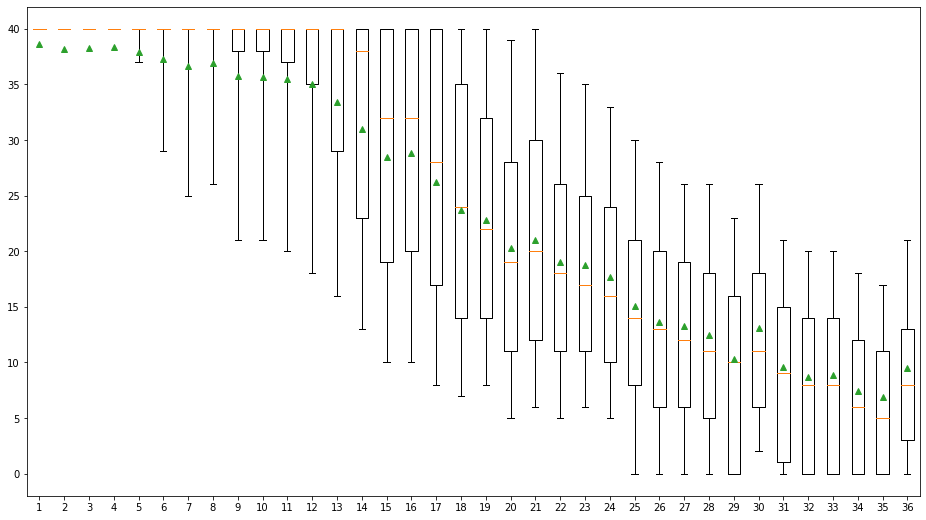

In [3]:
import matplotlib.pyplot as plt
 
# FASTQ形式のデータを読み込む
records = SeqIO.parse('DRR000001.fastq', 'fastq')
 
# リードごとの塩基数を取得する
sequence_length_list = []
for record in records:
    sequence_length_list.append(len(record.seq))
 
# 最も塩基数が多いリードのリード長に合わせて空白のリストを生成する
quality_per_base_pos_list = []
for i in range(max(sequence_length_list)):
    quality_per_base_pos_list.append([])
 
# recordsのイテレータを先頭に戻すために再読み込み
records = SeqIO.parse('DRR000001.fastq', 'fastq')
 
# 塩基位置ごとに各リードのSequence Quality値を格納する
for record in records:
    for i in range(len(record.seq)):
        quality_per_base_pos_list[i].append(record.letter_annotations['phred_quality'][i])
 
# 箱ひげ図で塩基位置ごとのSequence Quality値の分布を表示する
fig, ax = plt.subplots(figsize=(16,9))
ax.boxplot(quality_per_base_pos_list, sym='', whis=[10,90], showmeans=True)
plt.savefig('fig.png')

各リードの平均Sequence Quality値のヒストグラムを表示

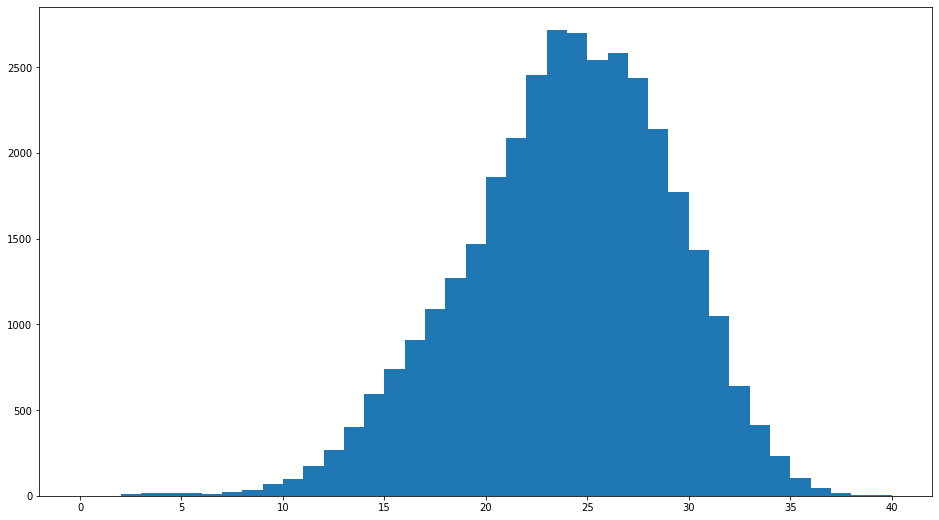

In [4]:
# FASTQ形式のデータを読み込む
records = SeqIO.parse('DRR000001.fastq', 'fastq')
 
# 各リードの平均Sequence Quality値をリストとして取得する
average_quality_per_sequence = []
for record in records:
    average_quality = sum(record.letter_annotations['phred_quality']) / len(record.letter_annotations['phred_quality'])
    average_quality_per_sequence.append(average_quality)
 
# 各リードの平均Sequence Quality値のヒストグラムを表示する
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(average_quality_per_sequence, bins=40, range=(0, 40))
plt.savefig('fig.png')

リード中の塩基位置ごとのATGCの割合を可視化

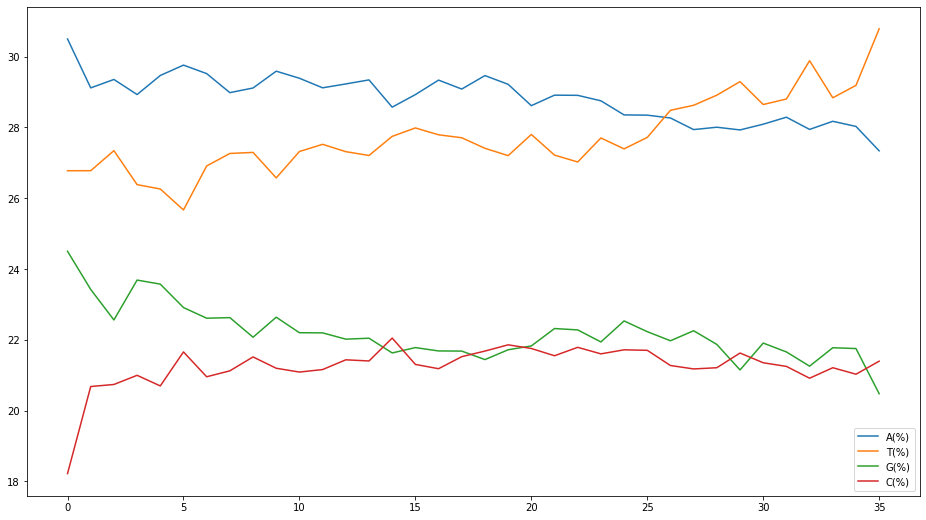

In [8]:
# FASTQ形式のデータを読み込む
records = SeqIO.parse('DRR000001.fastq', 'fastq')
 
# リードごとの塩基数を取得する
sequence_length_list = []
for record in records:
    sequence_length_list.append(len(record.seq))
  
# 最も塩基数が多いリードのリード長に合わせて空白のリストを生成する
ATGC_per_base_pos_list = []
for i in range(max(sequence_length_list)):
    ATGC_per_base_pos_list.append([])
  
# recordsのイテレータを先頭に戻すために再読み込み
records = SeqIO.parse('DRR000001.fastq', 'fastq')
 
# 各リードの位置ごとの塩基のリストを作成する
for record in records:
    for i in range(len(record.seq)):
        ATGC_per_base_pos_list[i].append(record.seq[i])
 
 
# リード内の位置ごとの各塩基の含まれる割合のリストを作成する
A_ratio = []
T_ratio = []
G_ratio = []
C_ratio = []
 
for ATGC_per_base_pos in ATGC_per_base_pos_list:
    A_count = ATGC_per_base_pos.count('A')
    T_count = ATGC_per_base_pos.count('T')
    G_count = ATGC_per_base_pos.count('G')
    C_count = ATGC_per_base_pos.count('C')
    ALL_count = A_count + T_count + G_count + C_count
 
    A_ratio.append(A_count / ALL_count * 100)
    T_ratio.append(T_count / ALL_count * 100)
    G_ratio.append(G_count / ALL_count * 100)
    C_ratio.append(C_count / ALL_count * 100)
 
  
# リード内の塩基の位置ごとのATGCの割合を折れ線グラフで表示する
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(A_ratio, label='A(%)')
ax.plot(T_ratio, label='T(%)')
ax.plot(G_ratio, label='G(%)')
ax.plot(C_ratio, label='C(%)')
ax.legend()
plt.savefig('fig.png')

各リードのGC含量のヒストグラムを表示する

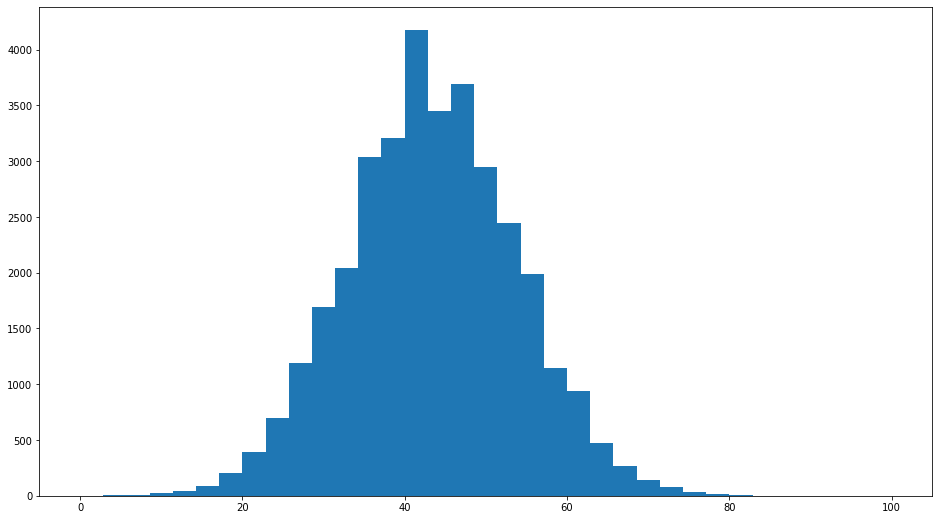

In [9]:
# FASTQ形式のデータを読み込む
records = SeqIO.parse('DRR000001.fastq', 'fastq')
  
# 各リードのGC含量をリストとして取得する
GC_ratio_per_sequence = []
for record in records:
    GC_count = record.seq.count('G') + record.seq.count('C')
    ATGC_count = GC_count + record.seq.count('A') + record.seq.count('T')
    GC_ratio = GC_count / ATGC_count * 100
    GC_ratio_per_sequence.append(GC_ratio)
 
# 各リードのGC含量のヒストグラムを表示する
fig, ax = plt.subplots(figsize=(16,9))
ax.hist(GC_ratio_per_sequence, bins=35, range=(0, 100))
plt.savefig('fig.png')

リード中の塩基位置ごとに読み取りに失敗した塩基数の割合を可視化

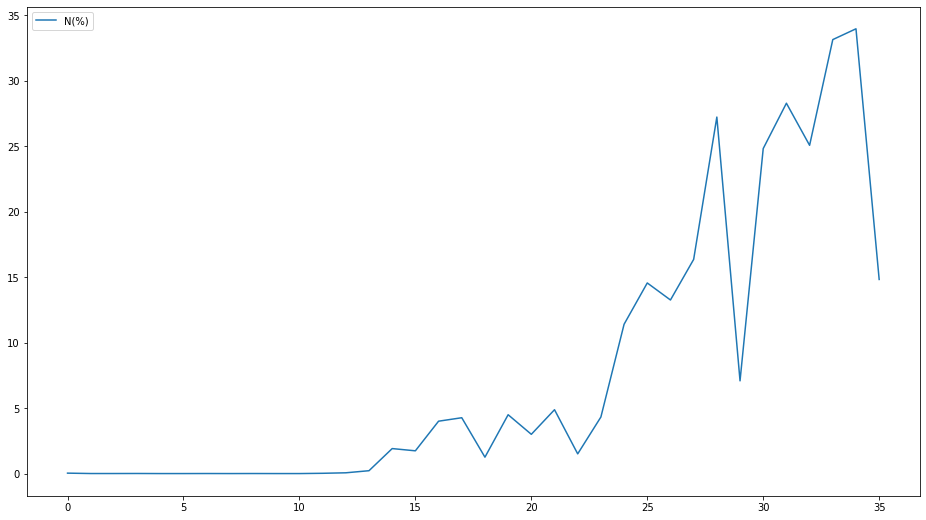

In [10]:
# FASTQ形式のデータを読み込む
records = SeqIO.parse('DRR000001.fastq', 'fastq')
 
# リードごとの塩基数を取得する
sequence_length_list = []
for record in records:
    sequence_length_list.append(len(record.seq))
  
# 最も塩基数が多いリードのリード長に合わせて空白のリストを生成する
ATGCN_per_base_pos_list = []
for i in range(max(sequence_length_list)):
    ATGCN_per_base_pos_list.append([])
  
# recordsのイテレータを先頭に戻すために再読み込み
records = SeqIO.parse('DRR000001.fastq', 'fastq')
 
# 各リードの位置ごとの塩基のリストを作成する
for record in records:
    for i in range(len(record.seq)):
        ATGCN_per_base_pos_list[i].append(record.seq[i])
 
 
# リード内の位置ごとのNの含まれる割合のリストを作成する
N_ratio = []
for ATGCN_per_base_pos in ATGCN_per_base_pos_list:
    N_count = ATGCN_per_base_pos.count('N')
    N_ratio.append(N_count / len(ATGCN_per_base_pos) * 100)
  
# リード内の塩基の位置ごとのNの割合を折れ線グラフで表示する
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(N_ratio, label='N(%)')
ax.legend()
plt.savefig('fig.png')